## In this notebook:
- Training your own small convnets from scratch
- Using data augmentation to mitigate overfitting


### In previous notebook: 
- What is convolution and maxpooling? 
- What are convnets? 
- What do convnets learn? 

### In next notebook:
- Using a pre-trained convnet to do feature extraction
- Fine-tuning a pre-trained convnet

In [1]:
from datetime import date
print(date.today())
author = "NirantK. https://github.com/NirantK/keras-practice"
print(author)

2017-12-26
NirantK. https://github.com/NirantK/keras-practice


In [2]:
import keras
print('Keras Version:', keras.__version__)
import os
if os.name=='nt':
    print('We are on Windows')

Using TensorFlow backend.


Keras Version: 2.0.8


In [3]:
import os, shutil

In [4]:
pwd = os.getcwd()

After downloading and uncompressing our [Cats and Dogs data](https://www.kaggle.com/c/dogs-vs-cats/data), we will create a new dataset containing three subsets: a training set with 1000 samples of each class, a validation set with 500 samples of each class, and finally a test set with 500 samples of each class.

Here are a few lines of code to do this:

In [5]:
import os, shutil

# The path to the directory where the original
# dataset was uncompressed
original_dataset_dir = os.path.join(pwd, 'data/train')
print(original_dataset_dir)

/home/nirant/keras-practice/data/train


In [6]:
# The directory where we will
# store our smaller dataset
base_dir = os.path.join(pwd, 'data/cats_and_dogs_small')
# print(base_dir)
try:
    os.mkdir(base_dir)
except FileExistsError:
    print("Data is already preprocessed. Overwriting existing. \nDo not run this code again to save time")
    shutil.rmtree(base_dir)
    os.mkdir(base_dir)
    
# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# Directory with our test cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# Directory with our test dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# Copy first 1000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copy first 1000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Code Snippet from Deep Learning in Python by F. Chollet

Data is already preprocessed. Overwriting existing. 
Do not run this code again to save time


In [7]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))
# Code Snippet from Deep Learning in Python by F. Chollet

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [8]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
# Code Snippet from Deep Learning in Python by F. Chollet

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [10]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

We will use the ```ImageDataGenerator``` from Keras to help us with image I/O. This returns Python generators (remember ```yield``` statements?)

In [11]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')
# Code Snippet from Deep Learning in Python by F. Chollet

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


**Model Training:**

If the training step fails with following logs: 
```E c:\l\work\tensorflow-1.1.0\tensorflow\stream_executor\cuda\cuda_dnn.cc:366] error retrieving driver version: Unimplemented: kernel reported driver version not implemented on Windows
```
or a a similar status of CUDNN. Do the following: 
- Shut down all other notebooks
- Restart this kernel 

A version of the above error occurs on Tensorflow backend with Keras. The failure occurs because TF is not able to access GPU memory in an expected memory. This is a known memory sharing issue [#6698](https://github.com/tensorflow/tensorflow/issues/6698)
and [#6586](https://github.com/tensorflow/tensorflow/issues/6586) with TF. 

In [12]:
# if you get CUDA_ERROR_OUT_OF_MEMORY, uncomment below, run and restart the notebook
# ! echo mypassword | sudo -S nvidia-modprobe -u -c=0

In [13]:
%time history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=15, validation_data=validation_generator,\
      validation_steps=50)
# Code Snippet and configuration from Deep Learning in Python by F. Chollet

Epoch 1/30
100/100 [==============================] - 6s - loss: 0.6859 - acc: 0.5515 - val_loss: 0.6694 - val_acc: 0.5550
Epoch 2/30
100/100 [==============================] - 4s - loss: 0.6381 - acc: 0.6345 - val_loss: 0.6480 - val_acc: 0.6140
Epoch 3/30
100/100 [==============================] - 4s - loss: 0.5958 - acc: 0.6925 - val_loss: 0.7042 - val_acc: 0.5680
Epoch 4/30
100/100 [==============================] - 5s - loss: 0.5633 - acc: 0.7045 - val_loss: 0.5947 - val_acc: 0.6840
Epoch 5/30
100/100 [==============================] - 5s - loss: 0.5326 - acc: 0.7335 - val_loss: 0.5969 - val_acc: 0.6890
Epoch 6/30
100/100 [==============================] - 5s - loss: 0.5116 - acc: 0.7470 - val_loss: 0.5618 - val_acc: 0.6980
Epoch 7/30
100/100 [==============================] - 5s - loss: 0.4794 - acc: 0.7635 - val_loss: 0.5754 - val_acc: 0.6970
Epoch 8/30
100/100 [==============================] - 4s - loss: 0.4605 - acc: 0.7765 - val_loss: 0.5879 - val_acc: 0.7150
Epoch 9/30
100/1

In [14]:
model.save('cats_and_dogs_small_1.h5')

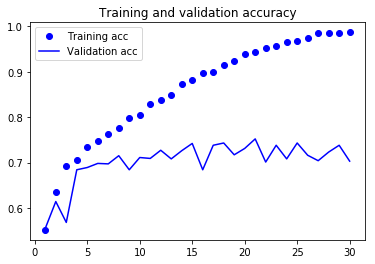

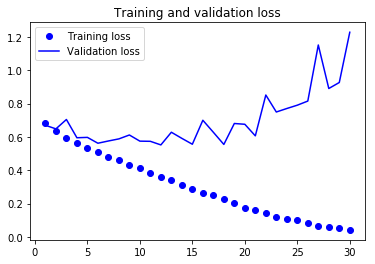

In [16]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Spotting Overfitting
---
We can see that the training and validation accuracy curve diverge from each other rather quickly. This alone is might not be a sure shot sign of overfitting. We also observe that the training loss drops smoothly while validation loss actually increases. These two graphs in conjunction with each other indicate overfittig. 

**How to avoid overfitting in neural networks?**

We will check data augmentation, which helps the model generalize a litte bit across standard image transforms. The downside with doing this is that the model might still end up overfitting something unexpected, we guard against that using ```dropout```.

In [17]:
# just for reference, let's calculate the test accuracy
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

%time test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.
CPU times: user 1.85 s, sys: 36 ms, total: 1.89 s
Wall time: 1.68 s
test acc: 0.680000014305


## Data Augmentation in Keras
I really like doing this in Keras. I have done this earlier in Matlab and Numpy and both are painful APIs

In [18]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

These are just a few of the options available (for more, see the Keras documentation). Let’s quickly go over what we just wrote:

- ```rotation_range``` is a value in degrees (0-180), a range within which to randomly rotate pictures.
- ```width_shift``` and ```height_shift``` are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally.
- ```shear_range``` is for randomly applying shearing transformations.
- ```zoom_range``` is for randomly zooming inside pictures.
- ```horizontal_flip``` is for randomly flipping half of the images horizontally — relevant when there are no assumptions of horizontal asymmetry (e.g. real-world pictures).
- ```fill_mode``` is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.


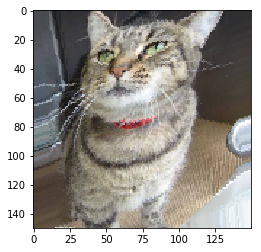

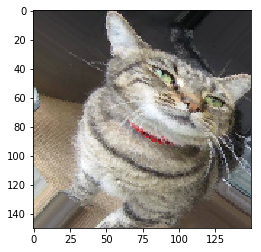

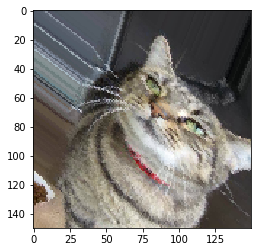

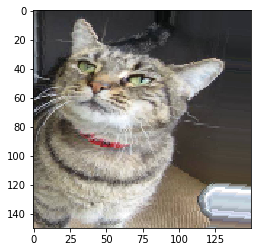

In [19]:
# This is module with image preprocessing utilities
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

# We pick one image to "augment"
img_path = fnames[240]

# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

Introducing Regularization Layer: Dropout
---
*from the abstract in [Dropout: A Simple Way to Prevent Neural Networks from Overfitting](https://www.cs.toronto.edu/~hinton/absps/JMLRdropout.pdf)*

The key idea is to randomly drop units (along with their connections) from the neural network during training. This prevents units from co-adapting too much. During training, dropout samples from an exponential number of different “thinned” networks. At test time, it is easy to approximate the effect of averaging the predictions of all these thinned networks by simply using a single unthinned network that has smaller weights. This significantly reduces overfitting and gives major improvements over other regularization methods. 


![](https://cdn-images-1.medium.com/max/1044/1*iWQzxhVlvadk6VAJjsgXgg.png)
*Image from the [Dropout: A Simple Way to Prevent Neural Networks from Overfitting](https://www.cs.toronto.edu/~hinton/absps/JMLRdropout.pdf)*

In [20]:
def create_model_with_dropout():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu',
                            input_shape=(150, 150, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

def model_compile(model):
    history = model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [21]:
model = create_model_with_dropout()
model_compile(model)

In [22]:
from keras.models import load_model
%time model = load_model('cats_and_dogs_small_2.h5')

CPU times: user 372 ms, sys: 12 ms, total: 384 ms
Wall time: 376 ms


## Testing Our Custom Model (Using no external dataset)

In [23]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

%time test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.
CPU times: user 1.87 s, sys: 32 ms, total: 1.9 s
Wall time: 1.68 s
test acc: 0.82000000596


# Mode Training Code

In [24]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

In [25]:
# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


**WARNING: Will take time to run on your CPU machines. This took about 45 minutes to run on a GTX 1060 and 25 minutes on GTX 1080**

In [24]:
# %time history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=100, \
#                                     validation_data=validation_generator, validation_steps=50)

Epoch 1/100
100/100 [==============================] - 15s - loss: 0.6928 - acc: 0.5203 - val_loss: 0.6884 - val_acc: 0.5228
Epoch 2/100
100/100 [==============================] - 14s - loss: 0.6884 - acc: 0.5366 - val_loss: 0.6682 - val_acc: 0.6295
Epoch 3/100
100/100 [==============================] - 14s - loss: 0.6739 - acc: 0.5722 - val_loss: 0.6556 - val_acc: 0.5863
Epoch 4/100
100/100 [==============================] - 14s - loss: 0.6556 - acc: 0.6103 - val_loss: 0.6210 - val_acc: 0.6753
Epoch 5/100
100/100 [==============================] - 14s - loss: 0.6426 - acc: 0.6238 - val_loss: 0.6806 - val_acc: 0.5742
Epoch 6/100
100/100 [==============================] - 16s - loss: 0.6280 - acc: 0.6469 - val_loss: 0.6424 - val_acc: 0.5889
Epoch 7/100
100/100 [==============================] - 14s - loss: 0.6142 - acc: 0.6597 - val_loss: 0.5707 - val_acc: 0.7055
Epoch 8/100
100/100 [==============================] - 14s - loss: 0.6037 - acc: 0.6691 - val_loss: 0.5577 - val_acc: 0.7164


100/100 [==============================] - 14s - loss: 0.4085 - acc: 0.8162 - val_loss: 0.3970 - val_acc: 0.8267
Epoch 67/100
100/100 [==============================] - 15s - loss: 0.3991 - acc: 0.8184 - val_loss: 0.4752 - val_acc: 0.7703
Epoch 68/100
100/100 [==============================] - 14s - loss: 0.3943 - acc: 0.8241 - val_loss: 0.4270 - val_acc: 0.8112
Epoch 69/100
100/100 [==============================] - 14s - loss: 0.4172 - acc: 0.8072 - val_loss: 0.4401 - val_acc: 0.8046
Epoch 70/100
100/100 [==============================] - 14s - loss: 0.4061 - acc: 0.8147 - val_loss: 0.3928 - val_acc: 0.8268
Epoch 71/100
100/100 [==============================] - 14s - loss: 0.3971 - acc: 0.8156 - val_loss: 0.4403 - val_acc: 0.8054
Epoch 72/100
100/100 [==============================] - 15s - loss: 0.4139 - acc: 0.8088 - val_loss: 0.4149 - val_acc: 0.8166
Epoch 73/100
100/100 [==============================] - 14s - loss: 0.3965 - acc: 0.8219 - val_loss: 0.4087 - val_acc: 0.8293
Epoch

In [25]:
# %time model.save('cats_and_dogs_small_2.h5')

CPU times: user 24 ms, sys: 24 ms, total: 48 ms
Wall time: 43.9 ms


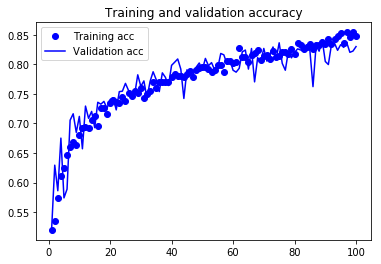

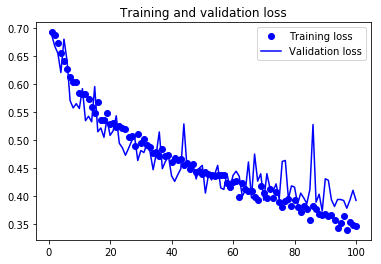

In [26]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()